<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/Hybrid%20KNN-RNN%20for%205%20class%20classifications%20based%20on%20WSN-DS%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Hybrid KNN-RNN for 5 class classifications based on WSN-DS dataset**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [2]:
# Load the dataset
dataset = pd.read_csv("dataset_WSN-DS.csv")

# Check for missing values
dataset.isnull().sum()

 id                 0
 Time               0
 Is_CH              0
 who CH             0
 Dist_To_CH         0
 ADV_S              0
 ADV_R              0
 JOIN_S             0
 JOIN_R             0
 SCH_S              0
 SCH_R              0
Rank                0
 DATA_S             0
 DATA_R             0
 Data_Sent_To_BS    0
 dist_CH_To_BS      0
 send_code          0
Expaned Energy      0
Class               0
dtype: int64

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374661 entries, 0 to 374660
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0    id               374661 non-null  int64  
 1    Time             374661 non-null  int64  
 2    Is_CH            374661 non-null  int64  
 3    who CH           374661 non-null  int64  
 4    Dist_To_CH       374661 non-null  float64
 5    ADV_S            374661 non-null  int64  
 6    ADV_R            374661 non-null  int64  
 7    JOIN_S           374661 non-null  int64  
 8    JOIN_R           374661 non-null  int64  
 9    SCH_S            374661 non-null  int64  
 10   SCH_R            374661 non-null  int64  
 11  Rank              374661 non-null  int64  
 12   DATA_S           374661 non-null  int64  
 13   DATA_R           374661 non-null  int64  
 14   Data_Sent_To_BS  374661 non-null  int64  
 15   dist_CH_To_BS    374661 non-null  float64
 16   send_code        37

### **Data Preprocessing**

In [4]:
from keras.utils import np_utils
encoder = LabelEncoder()
y = encoder.fit_transform(dataset['Class'])
y = np_utils.to_categorical(y, num_classes=5)
X = dataset.drop(['Class'],axis=1)
X=X.values
print(X.shape)
print(y.shape)

(374661, 18)
(374661, 5)


In [5]:
# Data preprocessing
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

**Hybrid KNN-RNN for 4 Class**

In [7]:
# K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
# RNN model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10)

# Predictions from K-NN model
y_pred_knn = knn.predict(X_test)

# Predictions from RNN model
y_pred_rnn = model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred_rnn = np.argmax(y_pred_rnn, axis=1)

Epoch 1/10
42509/42509 [==============================] - 557s 13ms/step - loss: 68.9808 - accuracy: 0.3336
Epoch 2/10
42509/42509 [==============================] - 546s 13ms/step - loss: 11.9748 - accuracy: 0.3979
Epoch 3/10
42509/42509 [==============================] - 555s 13ms/step - loss: 1.6095 - accuracy: 0.2002
Epoch 4/10
42509/42509 [==============================] - 547s 13ms/step - loss: 1.6095 - accuracy: 0.2006
Epoch 5/10
42509/42509 [==============================] - 553s 13ms/step - loss: 1.6095 - accuracy: 0.1998
Epoch 6/10
42509/42509 [==============================] - 552s 13ms/step - loss: 1.6095 - accuracy: 0.2001
Epoch 7/10
42509/42509 [==============================] - 559s 13ms/step - loss: 1.6095 - accuracy: 0.2007
Epoch 8/10
42509/42509 [==============================] - 555s 13ms/step - loss: 1.6095 - accuracy: 0.1999
Epoch 9/10
42509/42509 [==============================] - 531s 12ms/step - loss: 1.6095 - accuracy: 0.2000
Epoch 10/10
10628/10628 [==========

In [9]:
# Combine predictions from K-NN and RNN models
y_pred = (y_pred_knn + to_categorical(y_pred_rnn, num_classes=5)) // 2

# Evaluation metrics
print("Combined Model:")
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))
print(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

Combined Model:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.25      0.99      0.40     67745
           1       0.00      0.00      0.00     68144
           2       0.00      0.00      0.00     68282
           3       0.00      0.00      0.00     68009
           4       0.99      1.00      1.00     67886

    accuracy                           0.40    340066
   macro avg       0.25      0.40      0.28    340066
weighted avg       0.25      0.40      0.28    340066

[[67375     0     0     0   370]
 [68121     0     0     0    23]
 [68280     0     0     0     2]
 [67982     0     0     0    27]
 [   22     0     0     0 67864]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def conf_mat(d1,d2):
  cm = confusion_matrix(d1, d2)
  plt.figure(figsize=(6,5.5))
  ax = sns.heatmap(cm,  fmt='2', annot=True, cmap='YlGnBu')
  sns.set(font_scale=1)
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values\n');
  ax.xaxis.set_ticklabels(['Normal','Blackhole','Flooding','Grayhole','TDMA'])
  ax.yaxis.set_ticklabels(['Normal','Blackhole','Flooding','Grayhole','TDMA'])
  plt.tight_layout()
  # plt.savefig("F1.eps", format = 'eps')
  plt.show()

Confusion Matrix of Hybrid KNN-RNN Model


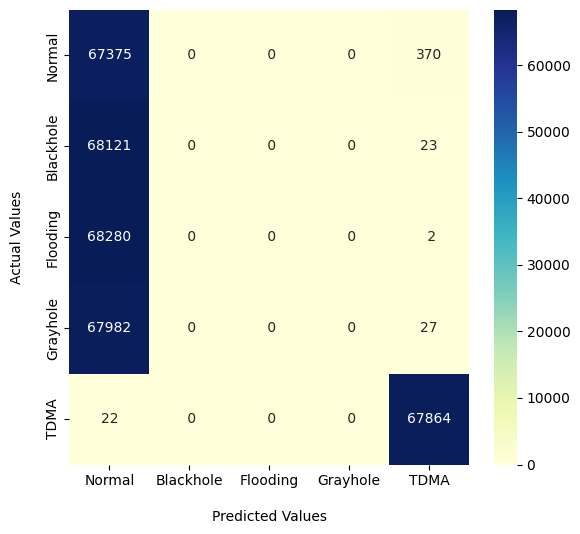

In [11]:
print("Confusion Matrix of Hybrid KNN-RNN Model") 
conf_mat(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

In [12]:
report = classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), output_dict=True)
detection_rates = {}
for cls in range(5):
    detection_rates[encoder.inverse_transform([cls])[0]] = report[str(cls)]['recall']
print("Detection rates:", detection_rates)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Detection rates: {0: 0.9945383423130858, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.9996759272898683}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
